<a href="https://colab.research.google.com/github/aubs7/CitrusPlantDisease/blob/main/Test_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Jan 17 13:54:05 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 17265 (delta 57), reused 14 (delta 14), pack-reused 17160 (from 4)
Receiving objects: 100% (17265/17265), 16.01 MiB | 17.24 MiB/s, done.
Resolving deltas: 100% (11799/11799), done.


In [3]:
!pip install -r /content/yolov5/requirements.txt
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 31.8 MB/s eta 0:00:00
Setup complete. Using torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=d27ea16b-7152-741d-d916-4ddbd08f5272, L2_cache_size=4MB)


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kJ98LX97AwuwrMipefBy")
project = rf.workspace("aubsmin").project("citrus-leaves")
version = project.version(10)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Citrus-Leaves-10 in yolov5pytorch:: 100%|██████████| 390/390 [00:00<00:00, 4496.76it/s]


In [5]:
!cat /content/Citrus-Leaves-10/data.yaml

names:
- greening
- healthy
- others
- pest
- white spots
nc: 5
roboflow:
  license: CC BY 4.0
  project: citrus-leaves
  url: https://universe.roboflow.com/aubsmin/citrus-leaves/dataset/10
  version: 10
  workspace: aubsmin
test: ../test/images
train: Citrus-Leaves-10/train/images
val: Citrus-Leaves-10/valid/images


In [10]:
yaml_content = """
names:
- greening
- healthy
- others
- pest
- white spots
nc: 5
roboflow:
  license: CC BY 4.0
  project: citrus-leaves
  url: https://universe.roboflow.com/aubsmin/citrus-leaves/dataset/10
  version: 10
  workspace: aubsmin

train: /content/Citrus-Leaves-10/train/images
val: /content/Citrus-Leaves-10/valid/images
test: /content/Citrus-Leaves-10/test/images

"""

# Write the content to the data.yaml file
with open('/content/Citrus-Leaves-10/data.yaml', 'w') as f:
    f.write(yaml_content)

In [12]:
!cat /content/Citrus-Leaves-10/data.yaml


names:
- greening
- healthy
- others
- pest
- white spots
nc: 5
roboflow:
  license: CC BY 4.0
  project: citrus-leaves
  url: https://universe.roboflow.com/aubsmin/citrus-leaves/dataset/10
  version: 10
  workspace: aubsmin

train: /content/Citrus-Leaves-10/train/images
val: /content/Citrus-Leaves-10/valid/images
test: /content/Citrus-Leaves-10/test/images



In [15]:
!ls /content/Citrus-Leaves-10/test/images | wc -l

20


In [16]:
%cd /content/yolov5/
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data /content/Citrus-Leaves-10/data.yaml \
  --weights yolov5s.pt \
  --name citrus_yolov5 \
  --cache \

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2025-01-17 13:58:04.668744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-17 13:58:04.691215: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-17 13:58:04.698083: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=

In [17]:
!find /content/yolov5/runs/train/ -name "results.png"

/content/yolov5/runs/train/citrus_yolov5/results.png


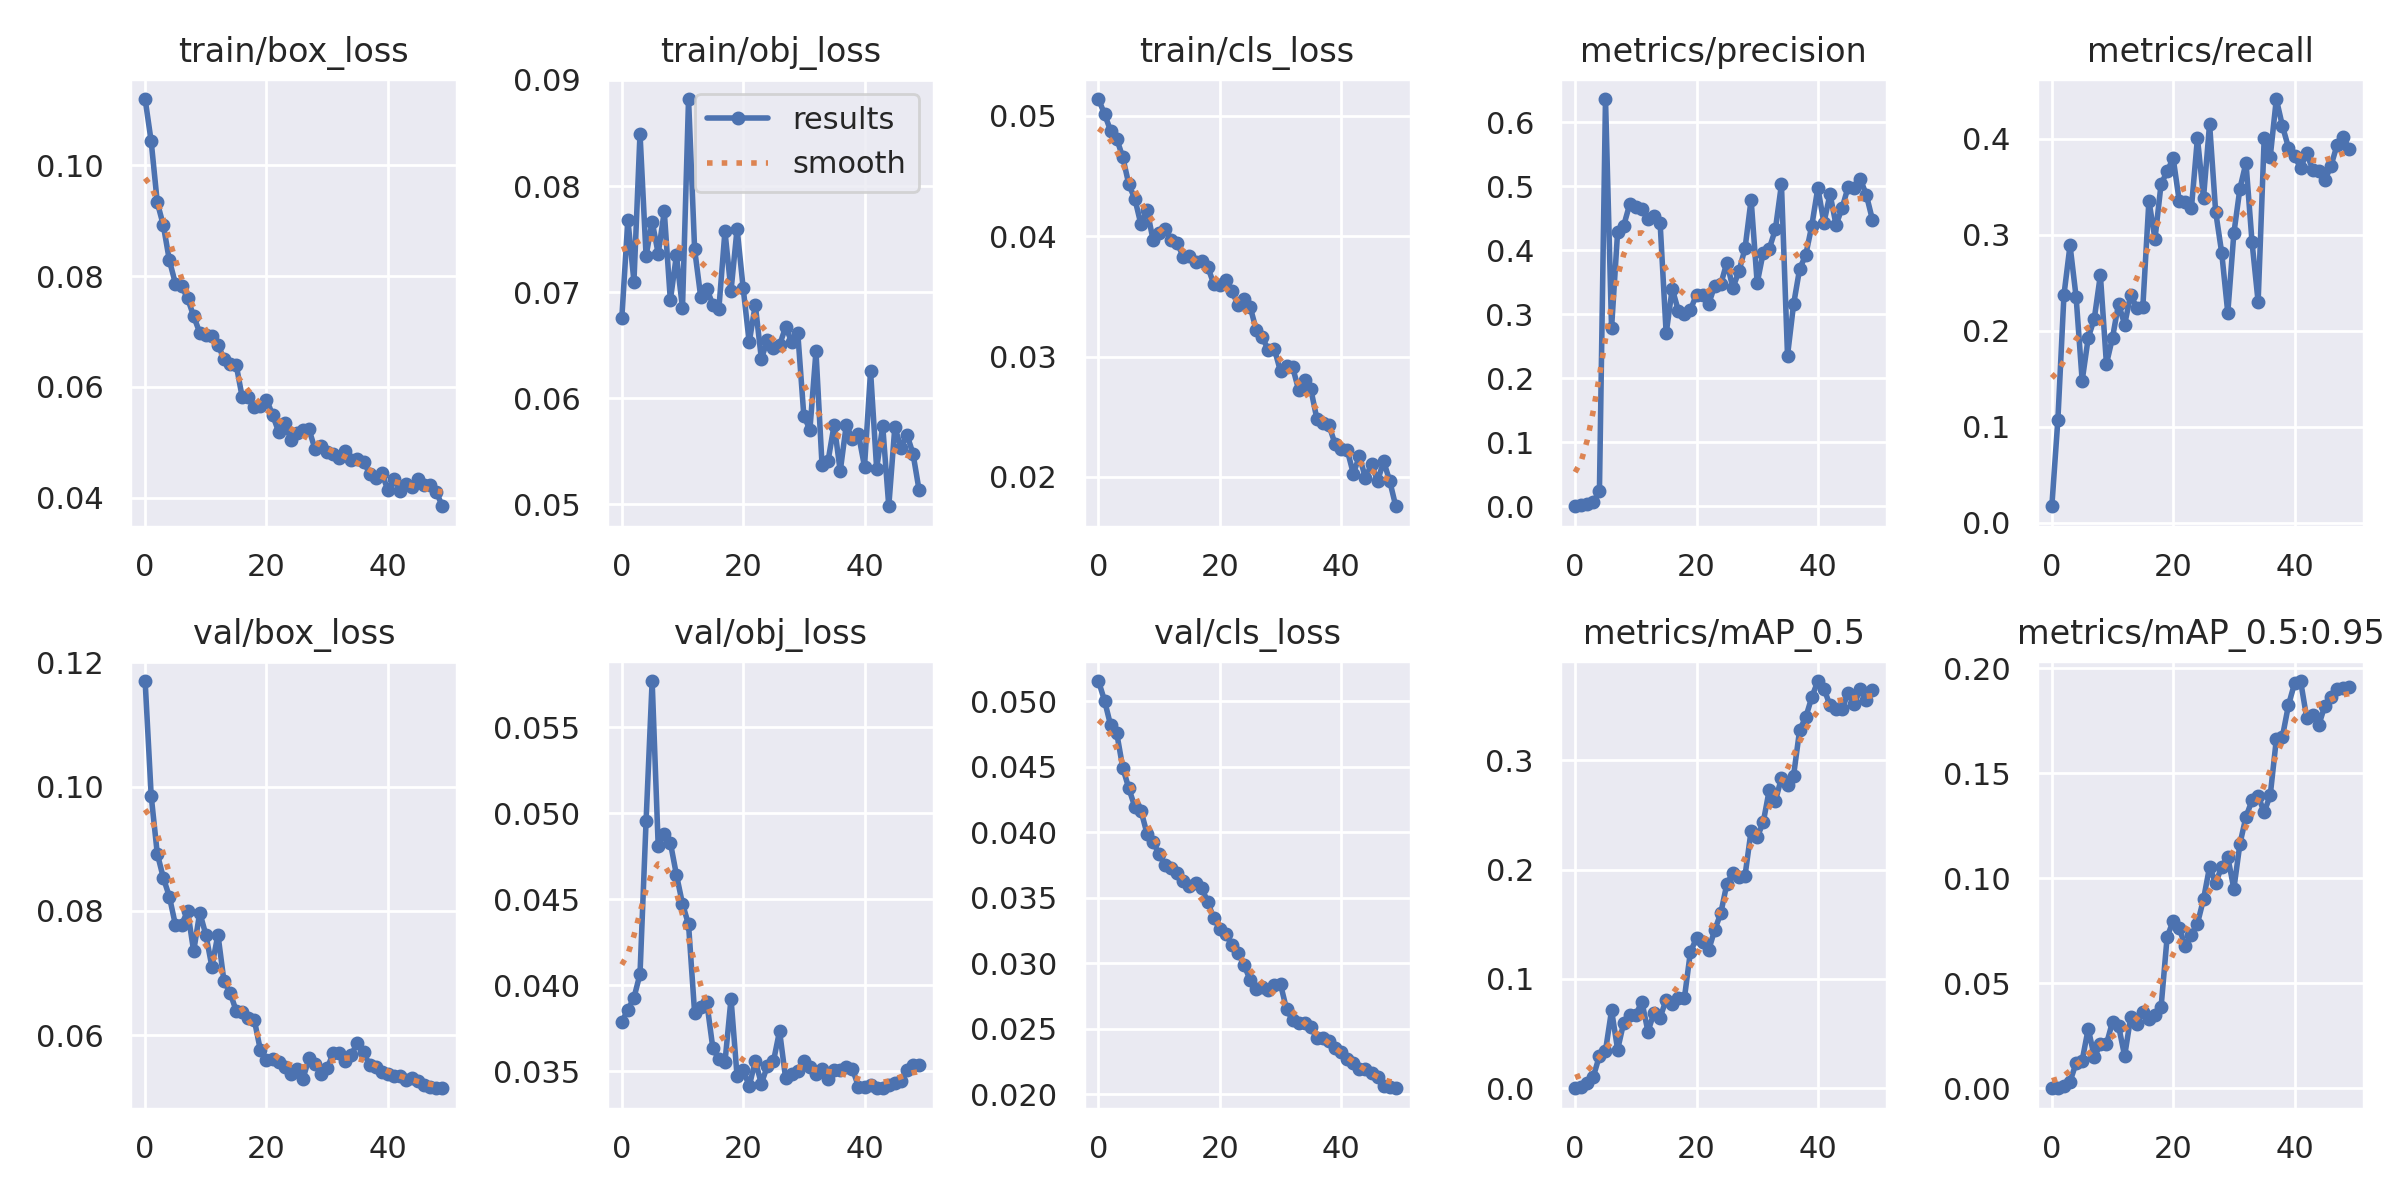

In [18]:
from IPython.display import Image, display
from utils.plots import plot_results  # plot results.txt as results.png

# Display the results image
display(Image(filename='/content/yolov5/runs/train/citrus_yolov5/results.png', width=1000))

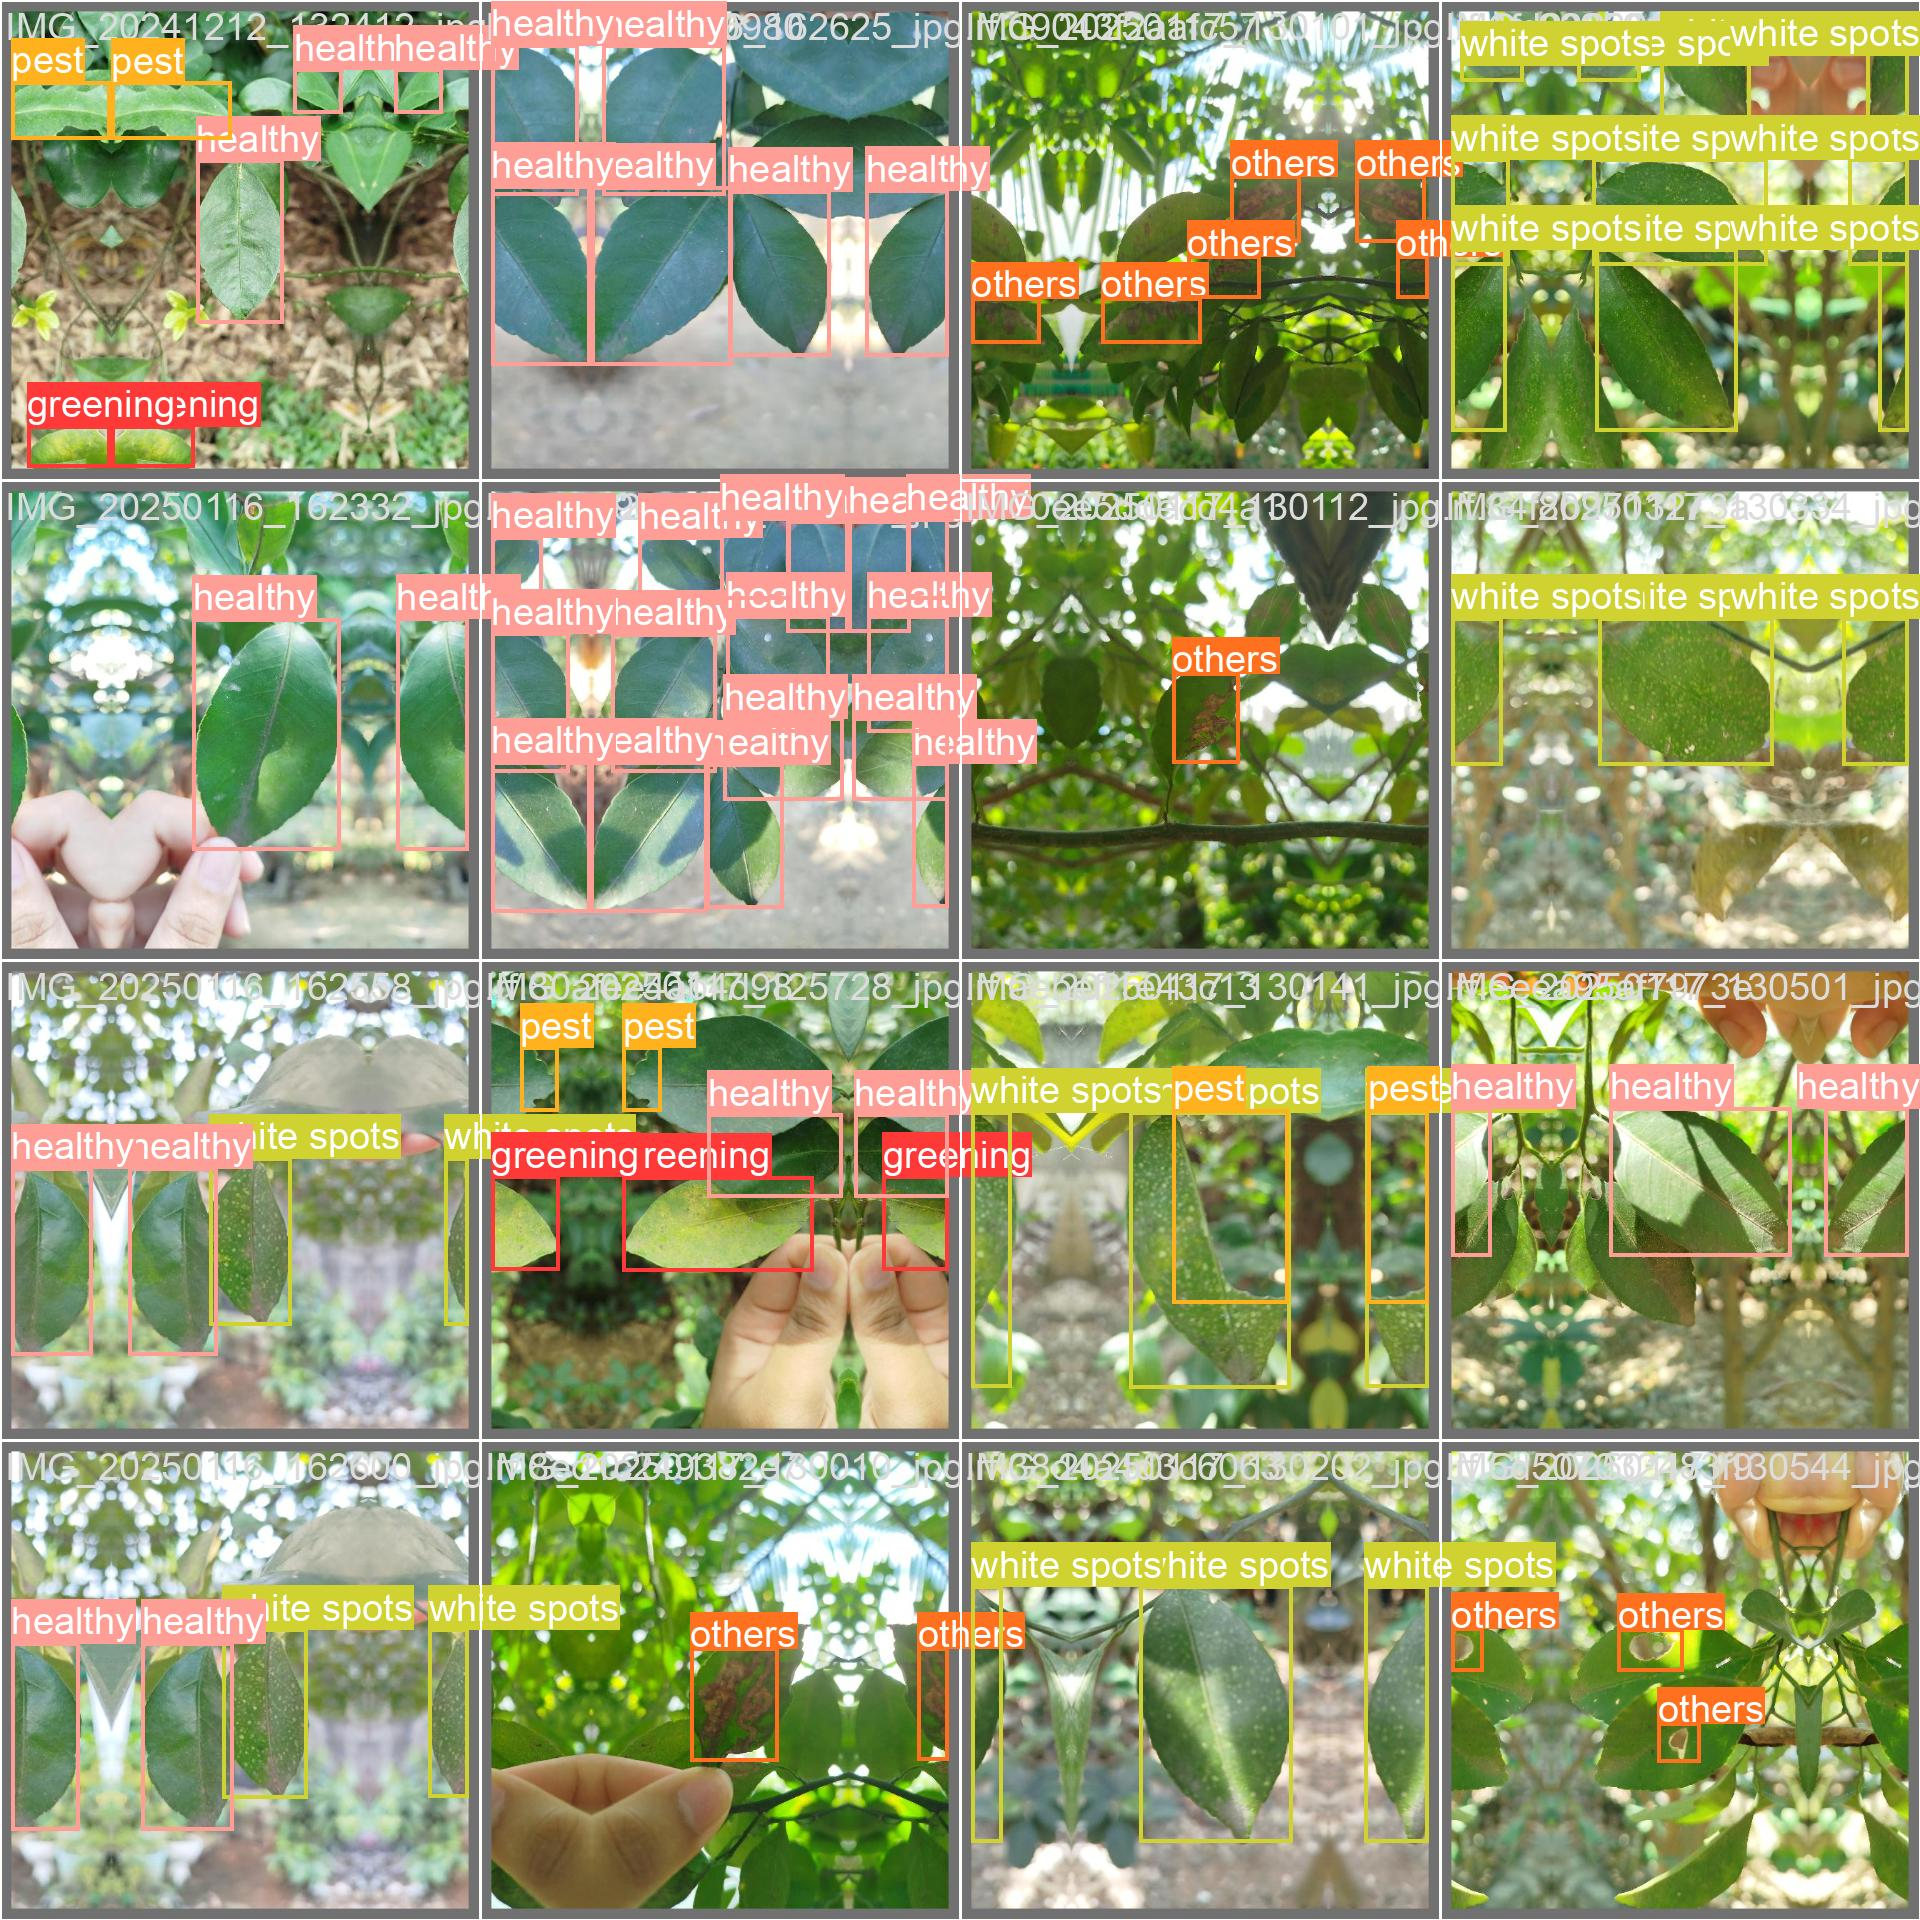

In [19]:
Image(filename='/content/yolov5/runs/train/citrus_yolov5/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


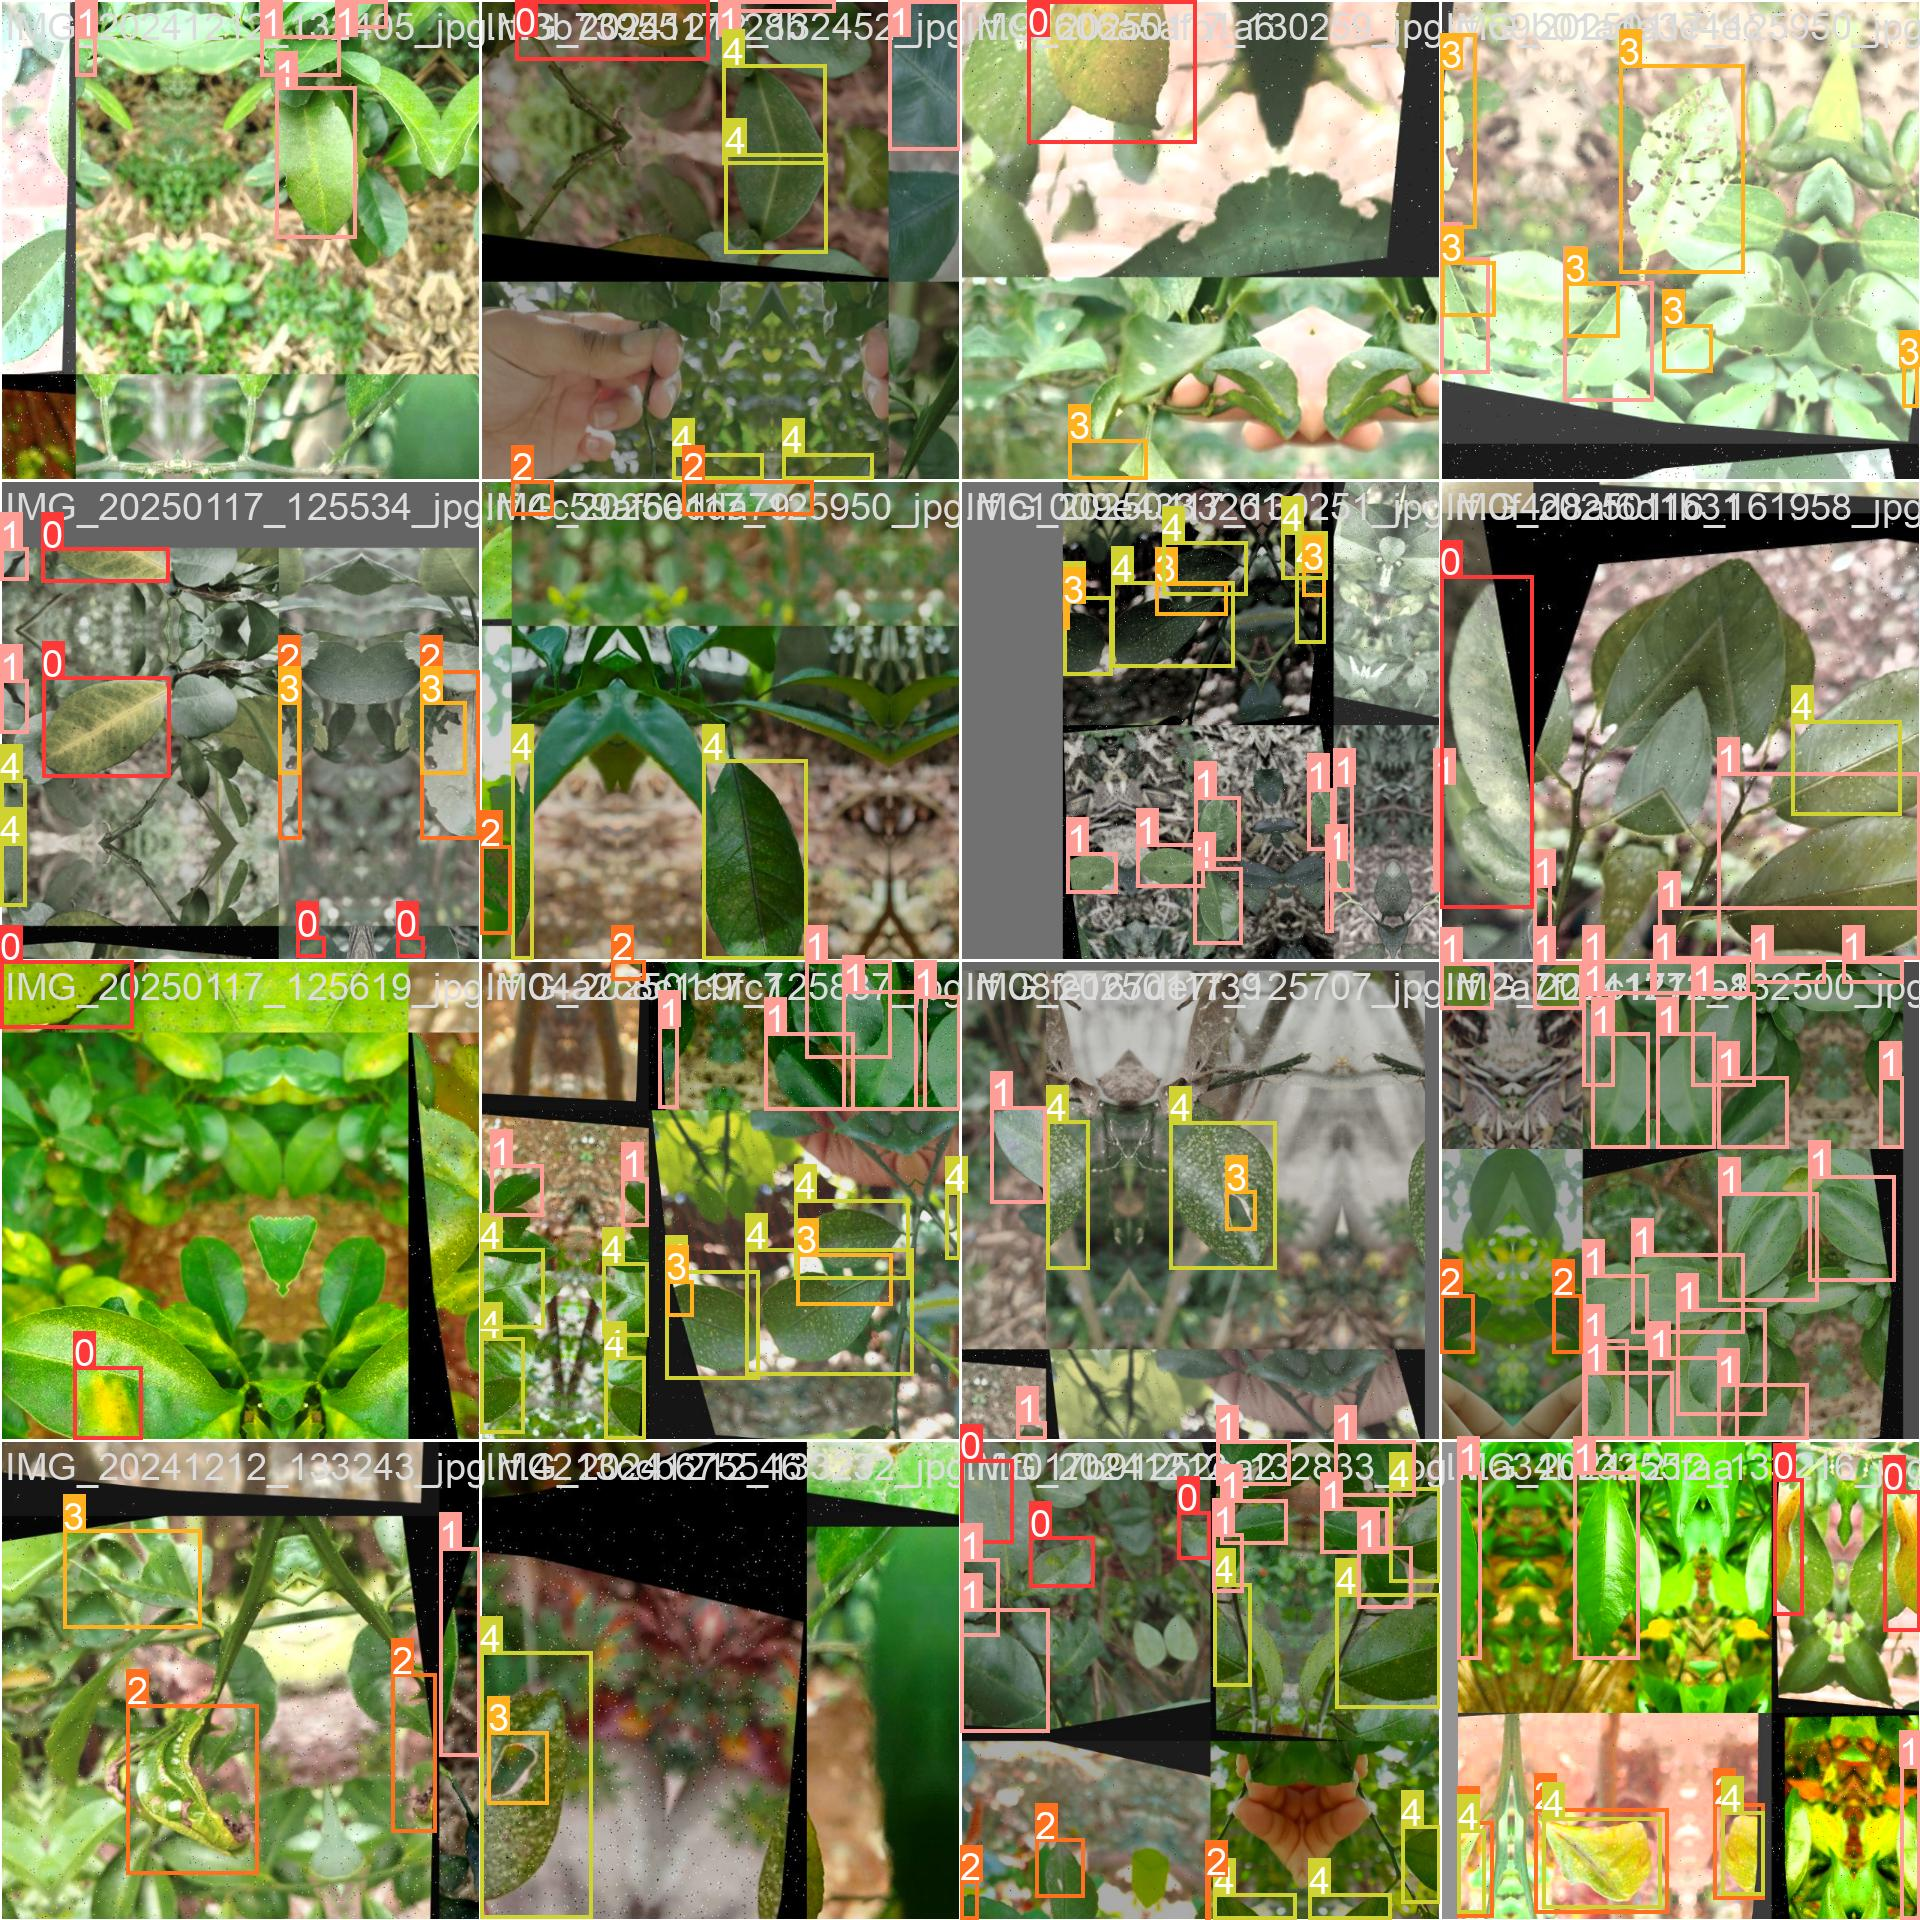

In [20]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/citrus_yolov5/train_batch0.jpg', width=900)

In [23]:
!python detect.py --weights /content/yolov5/runs/train/citrus_yolov5/weights/best.pt --img 640 --conf 0.25 --source /content/Citrus-Leaves-10/test/images

detect: weights=['/content/yolov5/runs/train/citrus_yolov5/weights/best.pt'], source=/content/Citrus-Leaves-10/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/20 /content/Citrus-Leaves-10/test/images/IMG_20241212_132349_jpg.rf.698bdd238f3e394f1d3efb25e67bce16.jpg: 640x640 2 greenings, 19 healthys, 11.5ms
image 2/20 /content/Citrus-Leaves-10/test/images/IMG_20241212_132417_jpg.

In [25]:
!python val.py --weights /content/yolov5/runs/train/citrus_yolov5/weights/best.pt --img 640 --data /content/Citrus-Leaves-10/data.yaml --task test

val: data=/content/Citrus-Leaves-10/data.yaml, weights=['/content/yolov5/runs/train/citrus_yolov5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/Citrus-Leaves-10/test/labels... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<00:00, 784.34it/s]
test: New cache created: /content/Citrus-Leaves-10/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.81s/it]
                   all         20         90        0.2      0.456      0.302      0.182
     

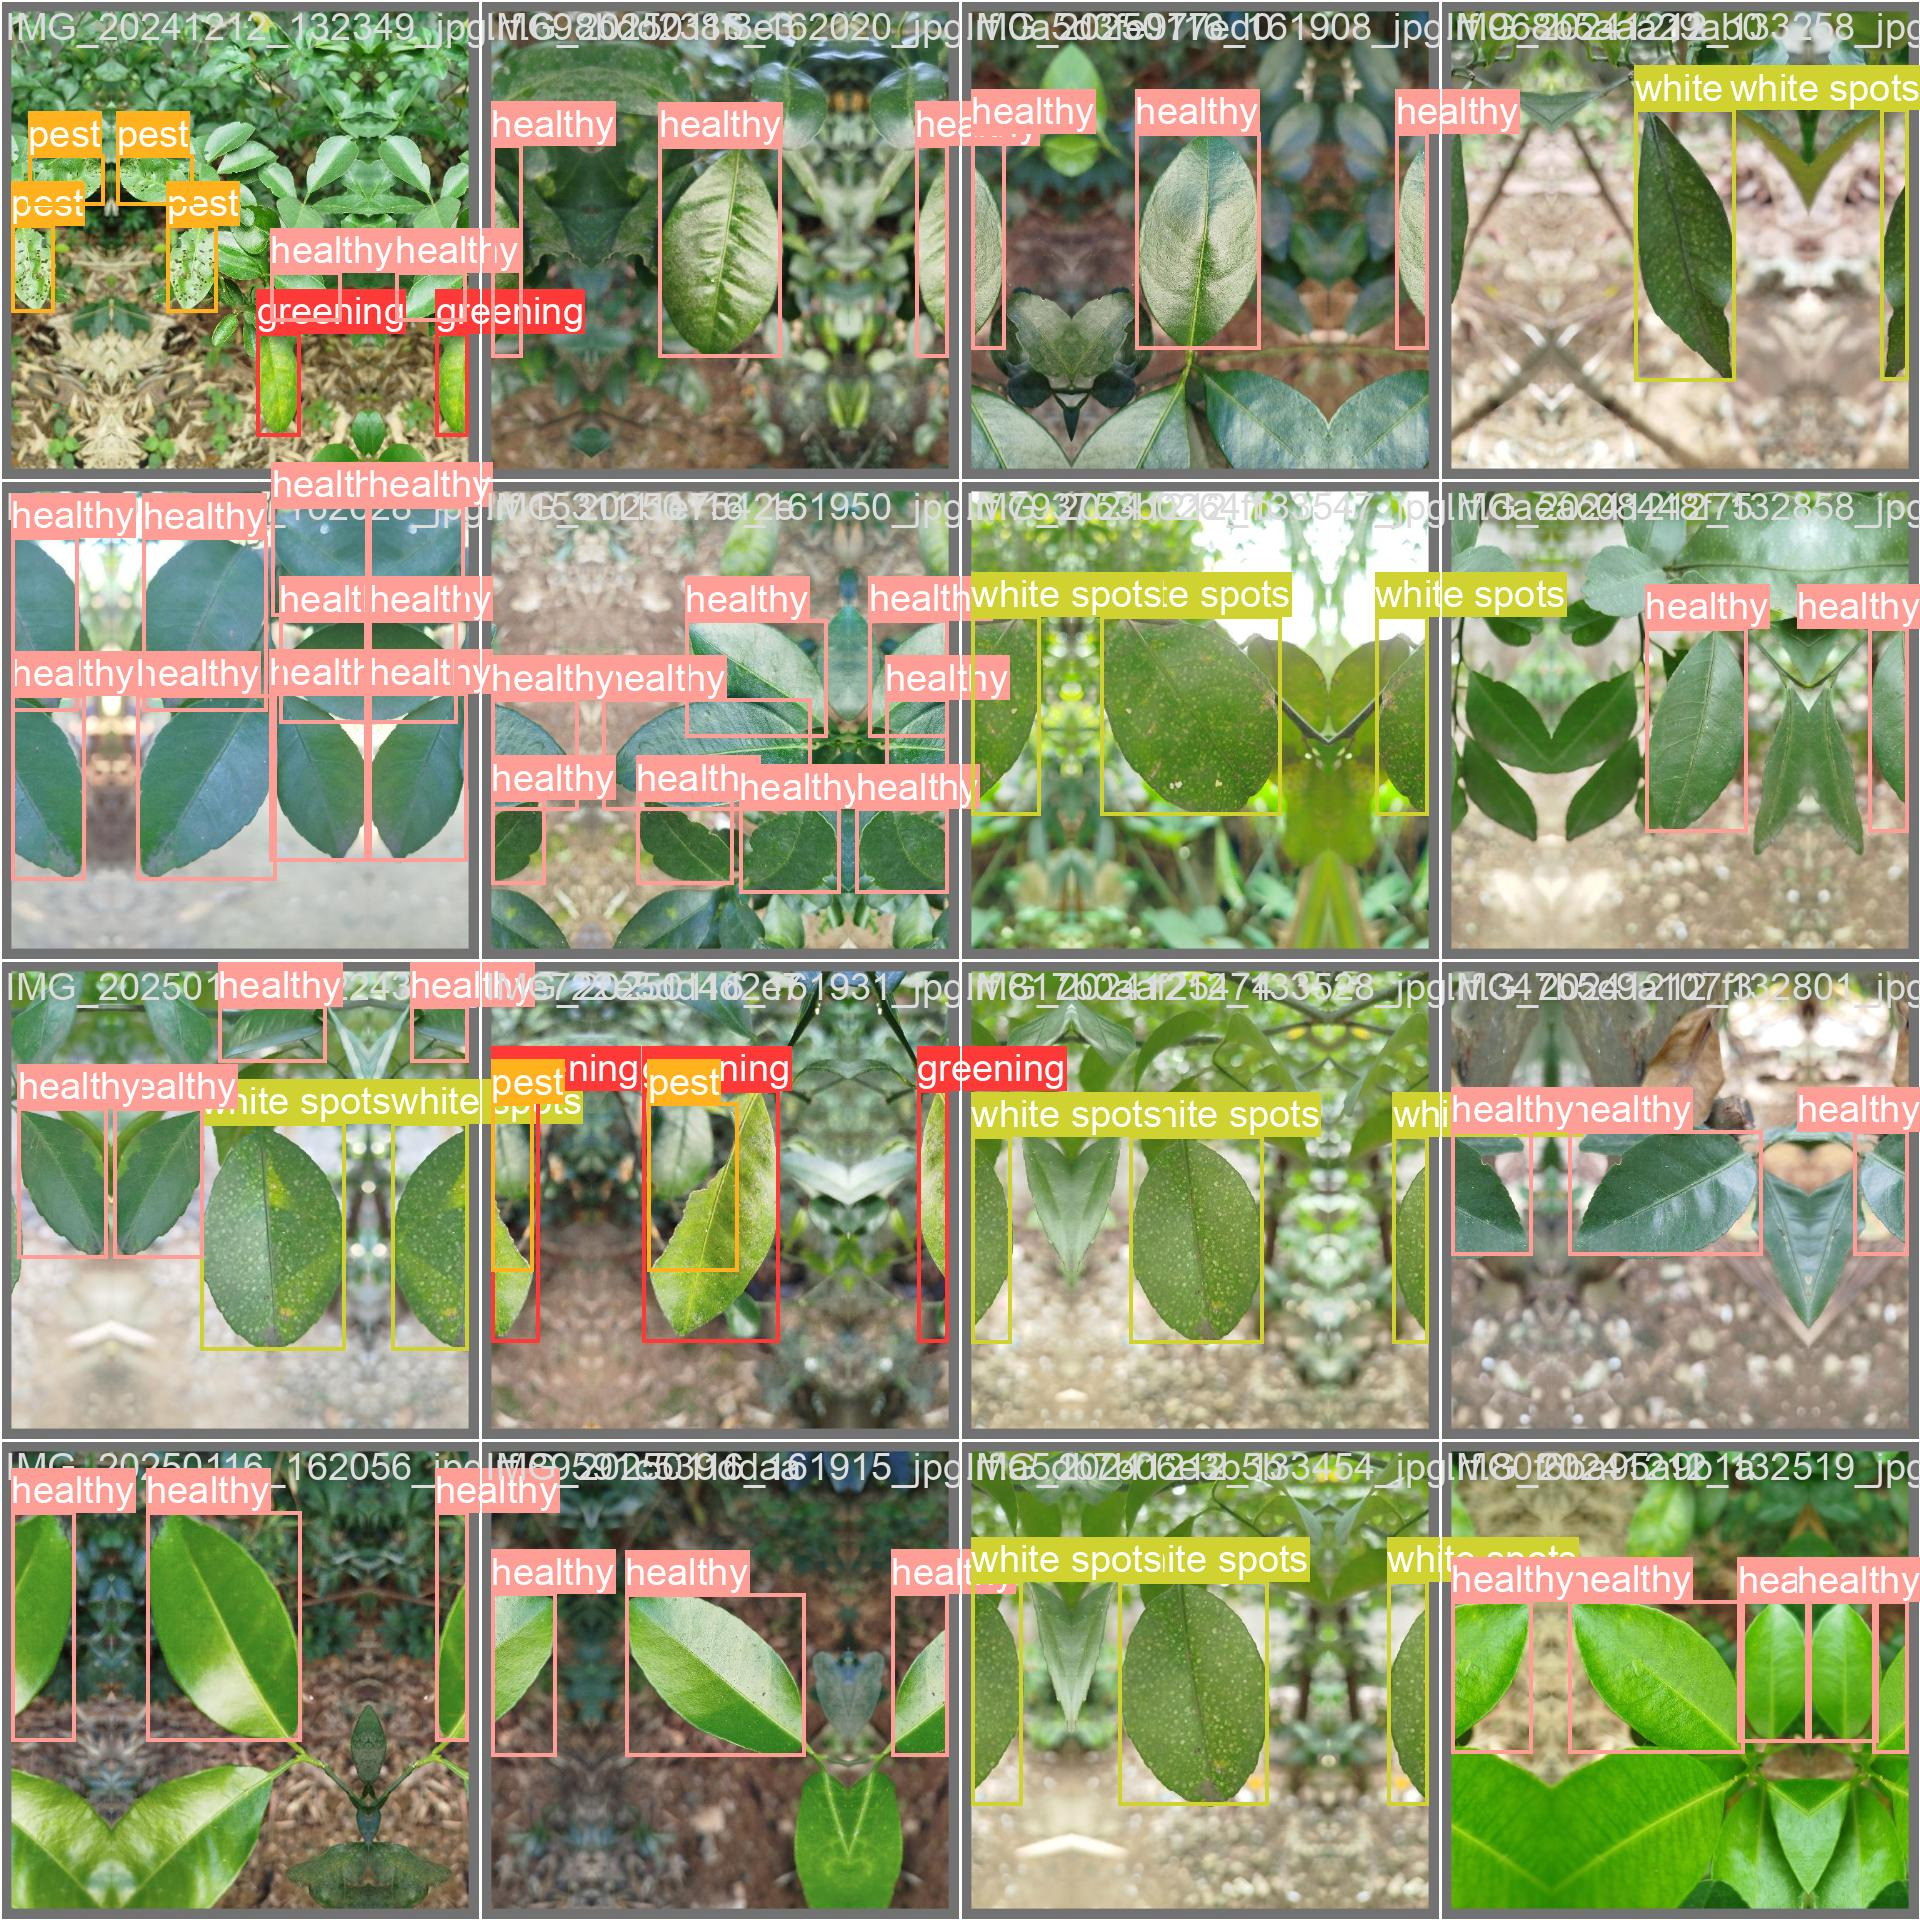

In [30]:
Image(filename='/content/yolov5/runs/val/exp3/val_batch0_labels.jpg', width=600)